In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!jupyter nbconvert --to PDF drive/My\ Drive/Colab\ Notebooks/"k_NN.ipynb"

In [2]:
import numpy as np
import pandas as pd
import operator, time
from matplotlib import pyplot as plt
from collections import Counter

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path_to_train = '/content/drive/My Drive/zip.train'
path_to_test = '/content/drive/My Drive/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], (training_data[:,0])
X_test, y_test = test_data[:,1:], test_data[:,0]

Overall Runtime:  46.140806674957275


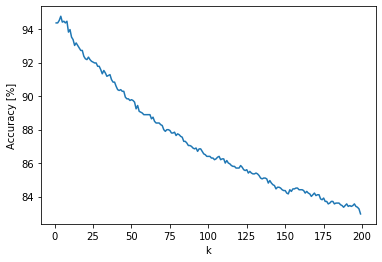

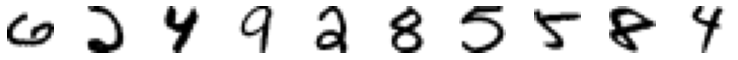

In [12]:
class KNearestNeighbors():
    def neighboursort(self, k, a, f) -> [(int,int)]:                                #Sorting Algorithm which returns only the nearest sorted k neighbors and indexes them
        if (f):
            z = list(zip(a,list(range(k))))
            z = sorted(z)                                                           #sorting k numbers to improve efficiency a lot
            for n in range(k,len(a)):                                               #if any number in a is smaller than z[i][0], replace z[i][0] with (a[n],n), else test z[i+1][0]
                for i in range(0,k):                                                #(n = index)
                    if (a[n]<z[i][0]):
                        z[i] = (a[n],n)
                        break      
            return(z) 
        return(sorted(list(zip(a,list(range(len(a)))))))                            #indexing every entry in a, timsorts and returns it
    
    def voteNeighbourhood(self, a) -> int:                                          #counts occurrences in a and returns max
        z = []
        for n in range(len(a)):
           z.append(y_train[a[n][1]])                                               #translates the returned indexes from indexsort to their respective number (y_train[index])
        d = Counter(z)
        if (len(d) == 1):
            return (z[0])     
        return (max(d.items(), key=operator.itemgetter(1))[0])

    def squared_euclidean_distance(self, x_1, x_2) -> [int]:
      return np.sum((x_1-x_2)**2, axis = 1)

    def acc_scan(self, a, ytest) -> float:                                          #tests the calculated image-numbers against their actual value (y_train[x])
        c,w = 0, []                                                                 #c = accuracy counter, w = array with wrong calculated numbers
        for n in range(len(ytest)):
            if (a[n] == ytest[n]):
                c+= 1
            else:
                w.append(n)
        return ([(c/len(ytest))*100,w])

    def plotter(self, x, y, xlabel, ylabel):                                        #Just a modularization of the plotting function
        plt.plot(x, y)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()
    
    def wrong_number(self, indices, train = X_train):
        samples = (10 if len(indices)>=10 else len(indices))                        #checking if < 10 wrong calculated numbers are present in array indices
        plt.figure(figsize=(20, 6))                                                 #Formatting image 
        for i in range(samples):
            plt.subplot(6, 15, i + 1)                                               #Scaling x/y
            plt.imshow(1-X_test[indices][i].reshape((16, 16)), cmap='gray')
            plt.axis('off')

    def main_method(self, k = [2,5], train = X_train, test = X_test, pl_flag = 1):
        global acc
        timer = time.time()
        pl, t = [], []                                                              #pl = saved accuracies, t = saved runtimes
        f = (1 if (len(k)<=2) else 0)                                               #switching to lighter calc. algo if len(k) <= 2 
        if (f):
            for i in k: 
                r = []                                                              #r = results of voteNeighbourhood for every testnumber
                for n in range(len(test)):
                    r.append(self.voteNeighbourhood(self.neighboursort(i, self.squared_euclidean_distance(train, test[n]), f)))
                acc = self.acc_scan(r, y_test)
                print ("[ k =", i, "] Accuracy:", acc[0])
                if (pl_flag == 1):                                                  #in case you don't want to spam your console ;)
                    pl.append(acc[0])
                    t.append(time.time()-timer)
                timer = time.time()
        else:
            z, uA, oA = [],[],[]                                                    #z = container for nsort results, uA = vote results for one k, oA = matrix for every respective vote result
            for n in range(len(test)):
                z.append(self.neighboursort(-1, self.squared_euclidean_distance(train, test[n]), f))
                for i in k:
                    uA.append(self.voteNeighbourhood(z[n][:i]))                     #calls vN with only the first k entries of z
                oA.append(uA)                                                       #(Every entry in oA is a matrix, where every element of said matrix corresponds to)
                uA = []                                                             #(to the voted number from vN in respect to k)
            for x in range(len(oA[0])):
                acc = self.acc_scan([i[x] for i in oA], y_test)                     #acc-check of every first/second/... element in n-touple of oA
                len(k)<=25 and print ("[ k =", k[x], "] Accuracy:", acc[0])         #spam-protector
                if (pl_flag == 1):
                    pl.append(acc[0])
            print ("Overall Runtime: ", time.time()-timer)
        if(len(k)>1 and pl_flag):
            self.plotter(k, pl, 'k', 'Accuracy [%]')
            f and self.plotter(k, t, 'k', 'runtime [s]')
        self.wrong_number(acc[1], train)                                            #[BUG] Pictures are generated after every main-method call is executed

#This kNN-Algorithm only accepts k = [a,b,...], where every testset will be tested
#based on the values in k. (Example is down below for k = [1,2,...199])
kNN = KNearestNeighbors()
kNN.main_method(list(range(1,200)))
